# Analyse simulations 2D avant amenagements (5min)


In [67]:
filepath = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/data_processing_2d/'

exec(open(filepath+'fonction2d.py').read())


"""local imports:"""
from PFlibs import io_pfb
from PFlibs import drv_vegm_io as vegio



In [68]:
root_dir = "/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/"
wdir = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/simus_2D_bnz/sim_5min_bani_sol_nu_veg2_BH/sim_1/'


outputdir_mil = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/outs'
path_mil = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/'
obsdir = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/NAD_dataset/'
evaldir_mil = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/Eval_2005_2012/Eval_2005_2012/'

In [69]:
## forcçages

## Mil
forc_mil = pd.read_csv(path_mil + "forc_2006_2009.txt", delim_whitespace=True, header = None,\
names = ['Swin','Lwin','Precip','Ta','U','V','Patm','q'], index_col = None)
forc_mil.index = pd.date_range("2006-01-01 00:00:00", periods=forc_mil.shape[0],freq='30min')

## Observation mil

obs_en_mil = pd.read_csv(evaldir_mil + "en_mil_obs_06_11.txt", delim_whitespace=True,\
 index_col = None,na_values= ['-9999.000','-6999.00000'])
obs_en_mil.index = pd.date_range("2006-01-01 00:00:00", periods=obs_en_mil.shape[0],freq='30min')
obs_en_mil['ET'] = 1800*obs_en_mil['LE']/2.5104e06
obs_en_mil['Rn_obs'] = forc_mil.Lwin - obs_en_mil.LWout + forc_mil.Swin - obs_en_mil.SWout
obs_en_mil['Rn_obs_in'] = forc_mil.Lwin  + forc_mil.Swin  
obs_en_mil['Rn_obs_out'] = obs_en_mil.LWout + obs_en_mil.SWout

#obs_en_mil.alb.replace(np.NaN, 0, inplace=True)
obs_en_mil['G']=np.mean([obs_en_mil.G1,obs_en_mil.G2,obs_en_mil.G3],axis=0)

obs_en_mil['H_LE'] = obs_en_mil['H'] + obs_en_mil['LE']
obs_en_mil['Rn_G'] = obs_en_mil['Rn_obs'] - obs_en_mil['G1']

obs_en_mil=obs_en_mil.loc['2006':'2009']

    
lai_mil_j = pd.read_csv(path_mil+'pheno_mil_cecile_2005_2012_j.txt', delim_whitespace=True,header=None,\
                   index_col = None)
lai_mil_j =lai_mil_j.set_index(pd.date_range("2005-01-01",periods=lai_mil_j.shape[0],freq="D"))

lai_mil_j=lai_mil_j.loc['2006':'2009']

#forc_bnz =  pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/forc_bnz_06_09.txt', delim_whitespace=True, header = None,\
#names = ['Swin','Lwin','Precip','Ta','U','V','Patm','q'], index_col = None)
#forc_bnz.index = pd.date_range("2006-01-01 00:00:00", periods=forc_bnz.shape[0],freq='30min')


# Supposons que df_wankama, df_tondi, et df_bani sont vos DataFrames


evts_pluvieux_bnz_90_21 = pd.read_csv('/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/evts_banizoumbou_6h_90_21.txt', delimiter='\t',\
index_col = None)
evts_pluvieux_bnz_90_21.index = evts_pluvieux_bnz_90_21.Starting
evts_pluvieux_bnz_90_21.index = pd.to_datetime(evts_pluvieux_bnz_90_21.index)

#evts_pluvieux_tondi_90_21 = pd.read_csv('/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/evts_pluie_tondi_6h_06_09.txt', delimiter='\t',\
# index_col = None)
#evts_pluvieux_tondi_90_21.index = evts_pluvieux_tondi_90_21.Starting
#evts_pluvieux_tondi_90_21.index = pd.to_datetime(evts_pluvieux_tondi_90_21.index)

#evts_pluvieux_wank_90_21 = pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/jachere_1d_cecile/evts_wank_jach_6h_06_11.txt', delimiter='\t',\
# index_col = None)
#evts_pluvieux_wank_90_21.index = evts_pluvieux_wank_90_21.Starting
#evts_pluvieux_wank_90_21.index = pd.to_datetime(evts_pluvieux_wank_90_21.index)



#df_wankama = evts_pluvieux_wank_90_21.loc['2006':'2009']
#df_tondi = evts_pluvieux_tondi_90_21.loc['2006':'2009']
df_bani =  evts_pluvieux_bnz_90_21.loc['2006':'2009']




#stat_wankama = df_wankama.describe()
#stat_tondi = df_tondi.describe()
stat_bani = df_bani.describe()


### Verification Forçages

In [70]:
## Forçages copiés dans le dossier de simu

dos = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/forc_dir/'

forc_bnz_5min =  pd.read_csv(dos+"forc_bani_5min_2006_2009.txt",names = ['Swin','Lwin','Precip','Ta','U','V','Patm','q'],\
                          delim_whitespace=True, header = None, index_col = None)
forc_bnz_5min .index = pd.date_range("2006-01-01 00:00:00", periods=forc_bnz_5min .shape[0],freq='5min')

## Forçages utilisés dans la simu

forc =  pd.read_csv(wdir+'forcagePF.txt.0', delim_whitespace=True, header = None,\
names = ['Swin','Lwin','Precip','Ta','U','V','Patm','q'], index_col = None)
#forc_bnz.index = pd.date_range("2006-01-01 00:00:00", periods=forc_bnz.shape[0],freq='30min')
forc.index = pd.date_range("2006-01-01 00:00:00", periods=forc.shape[0],freq='5min')



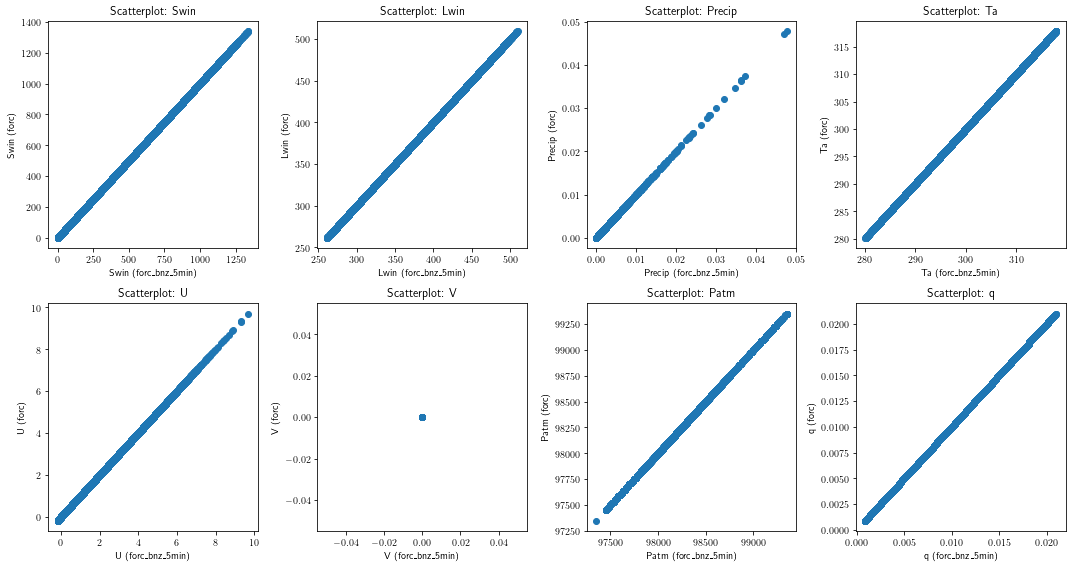

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer une liste de noms de colonnes communs
colonnes_communes = forc_bnz_5min.columns.intersection(forc.columns)

# Déterminer le nombre de colonnes et de lignes pour la disposition des sous-graphiques
nb_colonnes = len(colonnes_communes) // 2
nb_lignes = 2  # Pour aligner les graphiques sur deux lignes

# Créer une figure et des axes pour les sous-graphiques
fig, axes = plt.subplots(nb_lignes, nb_colonnes, figsize=(15, 8))

# Parcourir chaque paire de colonnes communes et tracer le scatterplot correspondant
for i, colonne in enumerate(colonnes_communes):
    ligne = i // nb_colonnes  # Calcule la ligne pour le sous-graphique
    colonne_index = i % nb_colonnes  # Calcule l'index de la colonne pour le sous-graphique
    
    # Tracer le scatterplot pour la paire de colonnes correspondantes
    axes[ligne, colonne_index].scatter(forc_bnz_5min[colonne], forc[colonne])
    axes[ligne, colonne_index].set_xlabel(f'{colonne} (forc_bnz_5min)')
    axes[ligne, colonne_index].set_ylabel(f'{colonne} (forc)')
    axes[ligne, colonne_index].set_title(f'Scatterplot: {colonne}')

# Ajuster automatiquement les paramètres de la figure pour un meilleur ajustement
plt.tight_layout()

# Afficher le graphique
plt.show()


### Ks utilisés


In [72]:

wdir1 = os.path.dirname(os.path.dirname(wdir)) + '/' 
#pfb_ks = io_pfb.PFB_read('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/perm_32_def.pfb',1)
pfb_ks = io_pfb.PFB_read(wdir1+'perm1.pfb',1)

#hdr = pfb_ks[1]
pfb_ks = pfb_ks[0]

#veg = parameters['VEG'][0]
#tal = parameters['TAL'][0]

#sn = pfb_ks[0,31:32, :1][0, 0]
#veg = pfb_ks[0,21:26, :1][0, 0]
#tal = pfb_ks[0,:1, :1][0, 0]



In [73]:
0.002/60

3.3333333333333335e-05

In [74]:
ks_sn = pfb_ks[0,:,:1].T[0,26:32].tolist() + pfb_ks[0,:,:1].T[0,21:26].tolist() + pfb_ks[0,:,:1].T[0,8:13].tolist()
                                
print("Ks des bandes nu:",ks_sn)

Ks des bandes nu: [3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 0.0003333333333333333, 0.0003333333333333333, 0.0003333333333333333, 0.0003333333333333333, 0.0003333333333333333, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05]


In [75]:
print("Ks bande de vegetattion 1:",((pfb_ks[0,:,:1].T)[0,21:26]).tolist())

Ks bande de vegetattion 1: [0.0003333333333333333, 0.0003333333333333333, 0.0003333333333333333, 0.0003333333333333333, 0.0003333333333333333]


In [76]:
print("Ks bande de vegetattion 2:",(pfb_ks[0,:,:1].T)[0,13:16].tolist())

Ks bande de vegetattion 2: [0.0003333333333333333, 0.0003333333333333333, 0.0003333333333333333]


In [77]:
print("Ks talus:",(pfb_ks[0,:,:1].T)[0,:8].tolist())



Ks talus: [3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05, 3.3333333333333335e-05]


### Ks de H2

In [78]:
0.252/60 ### Ks de H2 de base

0.0042

In [79]:
0.1/60 ### Ks de H2 de modifié (JP et CP)

0.0016666666666666668

In [80]:
### Ks de H2 utilisé dans la simu
pfb_ks[0,:1, 5:11]

array([[0.00016667, 0.00016667, 0.00016667, 0.00016667, 0.00016667,
        0.00016667]])

### Carte de vegetation utilisée

In [81]:
vegmap = io_pfb.PFB_read(wdir+'veg_map.pfb',1)
vegmap[0]

array([[[18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [19.],
        [19.],
        [19.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [19.],
        [19.],
        [19.],
        [19.],
        [19.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.],
        [18.]]])

### Fichier drv_vegm utilisé

In [82]:
drv_vegm = vegio.read_vegm(wdir+'/drv_vegm.dat')
drv_vegm

x  y  lat    lon    sand clay color  fractional coverage of grid by vegetation class (Must/Should Add to 1.0

       (Deg) (Deg)  (prct/100)   index  1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19



(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32.]),
 array([18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.,
        19., 19., 19., 18., 18., 18., 18., 18., 19., 19., 19., 19., 19.,
        18., 18., 18., 18., 18., 18.]))

### Relation pluie-débit

In [83]:
ds1 = read_and_process_pf_outputs(wdir)
with ParflowBinaryReader(glob.glob(wdir+'*.press.0000000.pfb')[0]) as s: h = s.header

var_dz = read_pfb(glob.glob(wdir+'*mult*.pfb')[0])
dc1 = read_clm_outputs(wdir,freq ='5min')
dc1 = dc1.assign(slopex=(("y"),read_pfb(glob.glob(wdir+'*slope_x*.pfb')[0])[0,:,0]))
dc1 = dc1.assign(slopey=(("y"),read_pfb(glob.glob(wdir+'*slope_y*.pfb')[0])[0,:,0]))
dc1 = dc1.assign(mask=(("z","y","x"),read_pfb(glob.glob(wdir+'*mask*.pfb')[0])))
#hill = Run.from_definition(root_dir+'jach_c_2d.pfidb')
hill = Run.from_definition(root_dir+'jach_c_2d.pfidb')
#manning = hill.Mannings.Geom.domain.Value

manning = 9.33E-8 ### 


dc1 = dc1.assign(Q=lambda x: ('time',calculate_runoff_from_press(x.htop.data[:,0],
                                                         x.slopex.data[0],
                                                         x.slopey.data[0],
                                                         h['dy'],h['dx'],manning)))


df = pd.DataFrame()
df['runoff'] = dc1.Q*1000/h['dx']/h['dy']/h['ny']*5
#df['runoff'] = dc1.Q[:,0]
#df.index = pd.date_range("2006-01-01 00:00:00", periods=forc_bnz.shape[0],freq='30min')
df.index = pd.date_range("2006-01-01 00:00:00", periods=df.shape[0],freq='5min')

df = df.loc['2006':'2008']



{'x': 0.0, 'y': 0.0, 'z': 0.0, 'nx': 1, 'ny': 32, 'nz': 30, 'dx': 100.0, 'dy': 25.0, 'dz': 1.0, 'n_subgrids': 4, 'p': 1, 'q': 4, 'r': 1}
{'x': 0.0, 'y': 0.0, 'z': 0.0, 'nx': 1, 'ny': 32, 'nz': 30, 'dx': 100.0, 'dy': 25.0, 'dz': 1.0, 'n_subgrids': 4, 'p': 1, 'q': 4, 'r': 1}
(315360, 38, 32, 1)
 => Error during CLM import - CLM specific key have been skipped


<string>:38: RuntimeWarning: invalid value encountered in power


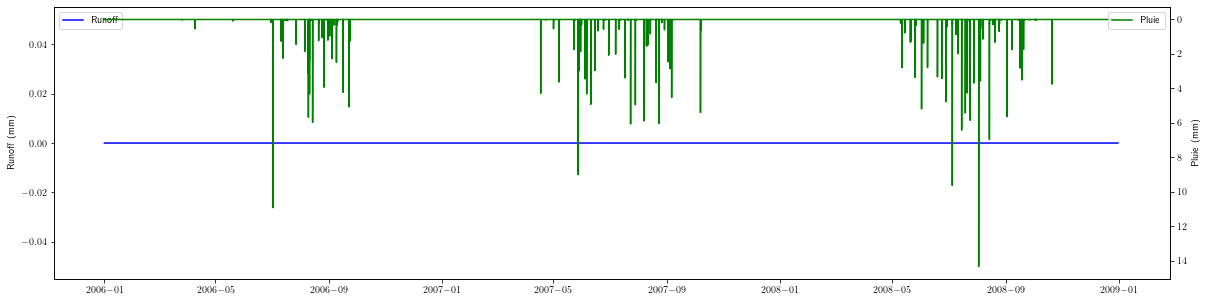

In [84]:
import matplotlib.pyplot as plt

# Supposons que df['runoff'] et pluie_tkn_30min['Pluie'] sont vos colonnes de données

pluie_bnz_5min = forc.loc['2006':'2009']

pluie_bnz_5min['Precip'] = forc.Precip*5*60

#pluie_bnz_30min['Precip'] = pluie_bnz_30min.Precip*5*60
pluie_bnz_5min = pluie_bnz_5min.loc['2006':'2008']

# Créer la figure et les sous-graphiques
fig, axs = plt.subplots(figsize=(20, 5), sharey=True)

# Boucle pour les années 2006 à 2008
# Tracer la colonne runoff sur l'axe principal
axs.plot(df['runoff'].index, df['runoff'], label='Runoff', color='blue')

# Créer un axe y secondaire partageant le même axe x
ax2 = axs.twinx()

# Tracer la colonne Pluie sur l'axe secondaire (inversé)
ax2.plot(pluie_bnz_5min['Precip'].index, pluie_bnz_5min['Precip'], label='Pluie', color='green')

# Inverser l'axe y de l'axe secondaire (mettre la pluie en haut)
ax2.invert_yaxis()

# Ajouter des légendes
axs.legend(loc='upper left')
ax2.legend(loc='upper right')
axs.set_ylabel('Runoff (mm)')
ax2.set_ylabel('Pluie (mm)')

# Afficher le graphique
plt.show()


## Pression

In [85]:
#dc1.htop.sel(time=slice('2006-06-01', '2006-11-30'))
dc1.htop.to_dataframe().describe()

htop
count  1.009152e+07
mean  -3.326081e+07
std    2.861453e+07
min   -8.856714e+07
25%   -5.778430e+07
50%   -3.034481e+07
75%   -6.018854e+04
max    1.266218e-04

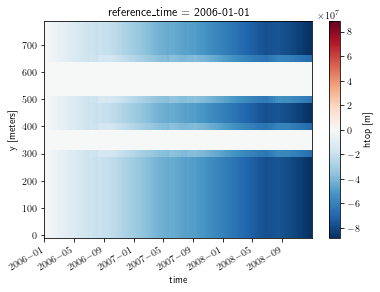

In [86]:
dc1.htop.plot(x='time')
#dc1.htop.plot(x='time',vmax = 2E-4,vmin= 0)

### Humidités du sol

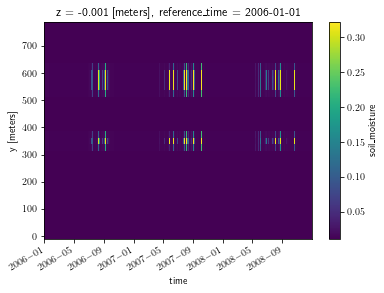

In [87]:
ds1.soil_moisture.isel(z=0).plot(x='time')

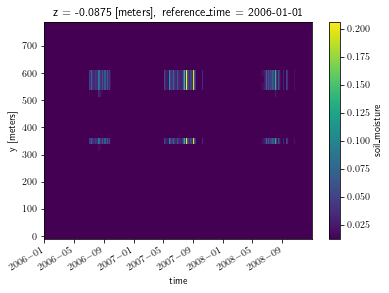

In [88]:
ds1.soil_moisture.isel(z=7).plot(x='time')

##### Echantillonnage Runoff

In [89]:
data_amenag =  pd.read_csv("/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/Pluie-Le_après-Aménagement.csv", delimiter=",")
data_amenag['Dates'] = pd.to_datetime(data_amenag['Dates'], format='%d/%m/%Y')
data_amenag['Pluie (mm)'] = data_amenag['Pluie (mm)'].str.replace(',', '.').astype(float)
data_amenag['LR_avant'] = data_amenag['LR_avant'].str.replace(',', '.').astype(float)
data_amenag['LR_après'] = data_amenag['LR_après'].str.replace(',', '.').astype(float)

data_amenag = data_amenag.set_index(data_amenag['Dates'])

data_amenag = data_amenag.loc['2006':'2008']

/tmp/ipykernel_7679/285847935.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data_amenag = data_amenag.loc['2006':'2008']


In [90]:
### Chargement des evts pluvieux calculés dans R
## Le temps inter evenements est de 6h


evts_pluvieux_bnz_90_21 = pd.read_csv('/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/evts_banizoumbou_6h_90_21.txt', delimiter='\t',\
 index_col = None)

evts_pluvieux_bnz_90_21.index = evts_pluvieux_bnz_90_21.Starting
evts_pluvieux_bnz_90_21.index = pd.to_datetime(evts_pluvieux_bnz_90_21.index)

evts_bnz_06_08 = evts_pluvieux_bnz_90_21.loc['2006':'2008']
evts_bnz_06_08  = evts_bnz_06_08[evts_bnz_06_08['Volume'] > 0.5]


In [91]:

import datetime
### La fin du runoff est la fin de la pluie + 5h30 min (Methode 1)
df_events_runoff = pd.DataFrame(columns=['Debut','Fin','runoff'],index=range(len(evts_bnz_06_08)))
#year = ['2006','2007','2008']

runoff_event = []

for j in range(len(evts_bnz_06_08)):
    #data_evts_2006 = evts_bnz_06_08.loc[i]
    fin_runoff = pd.to_datetime(evts_bnz_06_08['Starting'][j]) + datetime.timedelta(hours=(evts_bnz_06_08['Duration'][j]+5.5))
    rff = df.loc[pd.to_datetime(evts_bnz_06_08['Starting'][j]) : fin_runoff].sum()
    runoff_event = [pd.to_datetime(evts_bnz_06_08['Starting'][j]),fin_runoff,rff.runoff]

    df_events_runoff.loc[j] = runoff_event

df_events_runoff

Debut                  Fin runoff
0    2006-04-08 23:30:00  2006-04-09 05:30:00    0.0
1    2006-05-19 15:00:00  2006-05-19 23:30:00    0.0
2    2006-06-30 05:00:00  2006-06-30 11:30:00    0.0
3    2006-07-02 05:30:00  2006-07-02 16:00:00    0.0
4    2006-07-10 21:00:00  2006-07-11 11:30:00    0.0
..                   ...                  ...    ...
98   2008-09-15 21:00:00  2008-09-16 07:30:00    0.0
99   2008-09-18 03:30:00  2008-09-18 10:30:00    0.0
100  2008-09-19 23:30:00  2008-09-20 08:00:00    0.0
101  2008-10-03 00:30:00  2008-10-03 14:30:00    0.0
102  2008-10-20 17:30:00  2008-10-21 00:00:00    0.0

[103 rows x 3 columns]

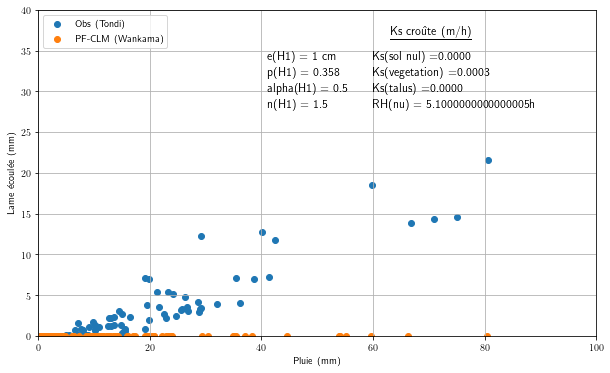

In [92]:
#a, b = np.polyfit(data_amenag['Pluie (mm)'],data_amenag['LR_avant'],1)
## Pluies annuelles Aghali
from scipy.stats import pearsonr
#f11 = open('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/SA_PF_TKN.tcl','r')
#contents = f11.readlines()

wdir1 = os.path.dirname(os.path.dirname(wdir)) + '/' 


sa_mil_files = glob.glob(f'{wdir1}/SA_mil*')
f11 = open(sa_mil_files[0], 'r')
contents = f11.readlines()

a_vg = contents[480][39:43]
n_vg = contents[481][39:42]

parameters = pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/SA_2D_simus_wank/perms.txt', delim_whitespace=True,index_col = None)

#pfb_ks = io_pfb.PFB_read('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/perm_32_def.pfb',1)
pfb_ks = io_pfb.PFB_read('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/simus_2D_bnz/perms_pfbs/perm1.pfb',1)

#hdr = pfb_ks[1]
pfb_ks = pfb_ks[0]

sn = pfb_ks[0,31:32, :1][0, 0]
#veg = parameters['VEG'][0]
#tal = parameters['TAL'][0]

veg = pfb_ks[0,21:26, :1][0, 0]
tal = pfb_ks[0,:1, :1][0, 0]

#rh = 0.01/sn
rh = 0.00017/sn


import pandas as pd
import matplotlib.pyplot as plt


# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.scatter(data_amenag['Pluie (mm)'], data_amenag['LR_avant'], marker='o',label='Obs (Tondi)')
plt.scatter(evts_bnz_06_08['Volume'],df_events_runoff['runoff'],marker='o',label='PF-CLM (Wankama)')
plt.rc('text', usetex=True)
#plt.scatter(data_amenag['Pluie (mm)'], data_amenag['LR_après'], marker='o',label='Après')
#plt.text(20, 70, f'Ks = {wdir[97:103]}', fontsize=12)
#plt.text(70, 90, f'Ks(H1) = {0.000481:.1e} m/h', fontsize=12)


plt.text(41, 34, f'e(H1) = {1} cm', fontsize=12)
plt.text(41, 32, r'p(H1) = 0.358', fontsize=12) 
plt.text(41, 30, 'alpha(H1) = {}'.format(float(a_vg)), fontsize=12)
#plt.text(41, 30,'alpha(H1) =%.4f '%float(a_vg), fontsize=12)
plt.text(41, 28, 'n(H1) = {}'.format(float(n_vg)), fontsize=12)


plt.text(63, 37,r'\underline{Ks croûte (m/h)}', fontsize=12)
plt.text(60, 34,'Ks(sol nul) =%.4f '%sn, fontsize=12)
plt.text(60, 32,'Ks(vegetation) =%.4f '%veg, fontsize=12)
plt.text(60, 30,'Ks(talus) =%.4f '%tal, fontsize=12)
#plt.text(60, 28,'R(nu) =%.4g h'%rh, fontsize=12)
plt.text(60, 28, 'RH(nu) = {}h'.format(float(rh)), fontsize=12)



#plt.text(20,34,'s_r=%.2f'%he.spearman_r(df_events_runoff['runoff'],data_amenag['LR_avant']))
#plt.text(20,30,' r=%.2f'%pearsonr(df_events_runoff['runoff'],data_amenag['LR_avant']))
#plt.text(60, 50, f'Ks = {'%.6f'%tal:.2e}', fontsize=12)


plt.xlabel('Pluie (mm)')
plt.ylabel('Lame écoulée (mm)')
#plt.title('Methode 1')
plt.xlim([0,100])
plt.ylim([0,40])
plt.grid(True)
plt.legend(loc='upper left')
plt.show()




In [93]:
## On arrete le runoff 1h avant le debut du prochain evenement de pluie 
#sauf le dernier qui pareil à la methode ci dessus (Methode 2)

df_events_runoff = pd.DataFrame(columns=['Debut','Fin','runoff'],index=range(len(evts_bnz_06_08)))
#year = ['2006','2007','2008']

runoff_event = []

for j in range(len(evts_bnz_06_08)):
    #data_evts_2006 = evts_bnz_06_08.loc[i]
    if j < range(len(evts_bnz_06_08))[-1]:
        fin_runoff = pd.to_datetime(evts_bnz_06_08['Starting'][j+1]) - datetime.timedelta(hours=(1))
        rff = df.loc[pd.to_datetime(evts_bnz_06_08['Starting'][j]) : fin_runoff].sum()
        runoff_event = [pd.to_datetime(evts_bnz_06_08['Starting'][j]),fin_runoff,rff.runoff]
    else:
        fin_runoff = pd.to_datetime(evts_bnz_06_08['Starting'][j]) + datetime.timedelta(hours=(evts_bnz_06_08['Duration'][j]+5.5))
        rff = df.loc[pd.to_datetime(evts_bnz_06_08['Starting'][j]) : fin_runoff].sum()
        runoff_event = [pd.to_datetime(evts_bnz_06_08['Starting'][j]),fin_runoff,rff.runoff]


    df_events_runoff.loc[j] = runoff_event


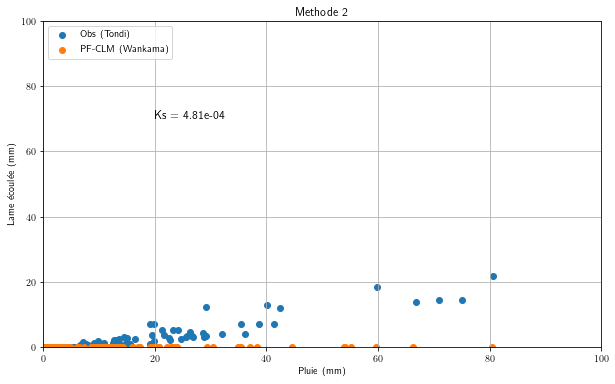

In [94]:
#a, b = np.polyfit(data_amenag['Pluie (mm)'],data_amenag['LR_avant'],1)
## Pluies annuelles Aghali

import pandas as pd
import matplotlib.pyplot as plt


# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.scatter(data_amenag['Pluie (mm)'], data_amenag['LR_avant'], marker='o',label='Obs (Tondi)')
plt.scatter(evts_bnz_06_08['Volume'],df_events_runoff['runoff'],marker='o',label='PF-CLM (Wankama)')
#plt.scatter(data_amenag['Pluie (mm)'], data_amenag['LR_après'], marker='o',label='Après')
plt.text(20, 70, f'Ks = {0.000481:.2e}', fontsize=12)
plt.xlabel('Pluie (mm)')
plt.ylabel('Lame écoulée (mm)')
plt.title('Methode 2')
plt.xlim([0,100])
plt.ylim([0,100])
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


